<a href="https://colab.research.google.com/github/pjcroxas/Transportation-Data-Science/blob/main/Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [26]:
dirs = "/content/drive/My Drive/Data Science Portfolio/Transportation Analytics"
crash_df = pd.read_excel(dirs+"/DRIVERs_2017_2021.xlsx")
crash_df.head()

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Hospital,driverPerson_id,Last Name,First Name,Involvment,Middle Name,Driver error,Alcohol/drugs,License Number,Seat belt/helmet
0,583f9f6a-65cb-48d5-bd3c-853d666f9b37,UTC,2018-01-29 03:46:47,2018-01-29 03:46:47,2017-12-29 23:30:00,2017-12-29 23:30:00,14.419749,121.045711,"Petron, East Service Road, Bunye Compound, Ala...",Muntinlupa,...,NaN,c0500619-4a72-43c2-b857-7fbc55e2c9fb,MEDALLO,JOHN DARYL,Driver,DIAMARTIN,NaN,NaN,N26-13-025165,NaN
1,583f9f6a-65cb-48d5-bd3c-853d666f9b37,UTC,2018-01-29 03:46:47,2018-01-29 03:46:47,2017-12-29 23:30:00,2017-12-29 23:30:00,14.419749,121.045711,"Petron, East Service Road, Bunye Compound, Ala...",Muntinlupa,...,NaN,02712c5e-cae8-409c-8dd2-9c2d22604f5f,PESIGAN,NOEL,Driver,DINGLASAN,NaN,NaN,D09-92038604,NaN
2,5994c8c9-7deb-4a9e-ac13-399f13756ab6,UTC,2018-01-24 11:20:21,2018-12-13 20:10:18,2017-12-29 21:19:00,2017-12-29 21:19:00,14.418383,121.044601,"Liwasan ng mga Bayani, Alabang-Zapote Road, Bu...",Muntinlupa,...,NaN,6d308b45-6c67-4aff-b894-347d0c46de43,DE TORRES,ALFREDO,Driver,DIPALAC,Inattentive,NaN,NaN,NaN
3,5994c8c9-7deb-4a9e-ac13-399f13756ab6,UTC,2018-01-24 11:20:21,2018-12-13 20:10:18,2017-12-29 21:19:00,2017-12-29 21:19:00,14.418383,121.044601,"Liwasan ng mga Bayani, Alabang-Zapote Road, Bu...",Muntinlupa,...,NaN,4145fee7-80cf-4c50-b541-ce15b9ad6d26,BIASA JR.,RAMON,Driver,BANER,NaN,NaN,N-07-98-277210,NaN
4,12c9dd4a-589f-49c2-a5fa-416f3f88f771,UTC,2018-01-29 03:36:13,2018-12-13 20:10:18,2017-12-29 02:54:00,2017-12-29 02:54:00,14.427427,121.045620,"East Service Road, Cupang, Muntinlupa, Metro M...",NaN,...,NaN,bb51a8ec-7bc5-4b93-8265-9a9c9042b453,ELPIDIO,CORNELIO,Driver,NaN,NaN,NaN,NaN,NaN


In [103]:
crash_df.shape

(32271, 46)

In [72]:
cm = sns.light_palette("green", as_cmap=True)
crash_meta = crash_df.isnull().sum().reset_index()
crash_meta

,index,0
0,record_id,0
1,timezone,2533
2,created,2533
3,modified,2533
4,occurred_from,2533
5,occurred_to,2533
6,lat,2533
7,lon,2533
8,location_text,2646
9,city,19025


# **Feature Engineering**

In [27]:
crash_df["occurred_day"] = crash_df["occurred_from"].dt.day
crash_df["occurred_dayofweek"] = crash_df["occurred_from"].dt.day_name()
crash_df["occurred_hour"] = crash_df["occurred_from"].dt.hour
crash_df["occurred_month"] = crash_df["occurred_from"].dt.month
crash_df["occurred_year"] = crash_df["occurred_from"].dt.year

In [28]:
crash_df.sample(5)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Middle Name,Driver error,Alcohol/drugs,License Number,Seat belt/helmet,occurred_day,occurred_dayofweek,occurred_hour,occurred_month,occurred_year
23377,bb212c0a-13f1-4977-b6b9-2746082598dd,UTC,2019-04-05 09:13:55,2019-04-05 09:13:55,2019-04-05 07:36:04,2019-04-05 07:36:04,14.627357,121.047396,"Ramon Magsaysay (Cubao) High School, EDSA, Pin...",Cubao,...,NaN,NaN,NaN,NaN,NaN,5.0,Friday,7.0,4.0,2019.0
10693,12d6c912-de79-4a47-861f-5e0f4f00e76c,UTC,2018-10-08 02:35:24,2018-10-08 02:35:24,2018-10-08 01:27:14,2018-10-08 01:27:14,14.657515,121.074239,"Pook Ricarte Open Air Basketball Court, Dagoho...",Quezon City,...,NaN,NaN,NaN,NaN,NaN,8.0,Monday,1.0,10.0,2018.0
10685,87430fde-d58f-40a1-b80f-9c9f765f2514,UTC,2018-10-08 06:31:08,2018-10-08 06:31:08,2018-10-08 05:41:19,2018-10-08 05:41:19,14.538158,121.004845,"Jollibee, EDSA, 150, Zone 16, Pasay, District ...",Pasay,...,NaN,NaN,NaN,NaN,NaN,8.0,Monday,5.0,10.0,2018.0
4323,7cabcddc-e98f-4124-83f3-03c536e06ed9,UTC,2017-04-18 10:53:44,2017-04-18 10:53:44,2017-04-18 09:53:41,2017-04-18 09:53:41,14.599656,121.059723,"Kilometer 21, EDSA, Camp Aguinaldo, Quezon Cit...",Quezon City,...,NaN,NaN,NaN,NaN,NaN,18.0,Tuesday,9.0,4.0,2017.0
11467,0e5f8174-f56a-4608-a286-3ec639de7622,UTC,2018-09-20 07:00:50,2018-09-20 07:00:50,2018-09-20 01:09:39,2018-09-20 01:09:39,14.643403,121.035937,"Nexor, Quezon Avenue, West Triangle, District ...",NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,Thursday,1.0,9.0,2018.0


# **Exploratory Data Analysis**

Event Involvement

In [39]:
crash_inv = crash_df.groupby(['record_id']).count()['timezone'].reset_index()
crash_inv.rename(columns={'timezone':'no. of person involved'}, inplace=True)

In [55]:
def collision_or_crash(data):
  if data > 1:
    return 'vehicle collision'
  elif data == 1:
    return 'vehicle crash'
  else:
    pass

crash_inv["classification"] = crash_inv["no. of person involved"].apply(collision_or_crash)

Text(0.5, 0, 'No. of persons involved')

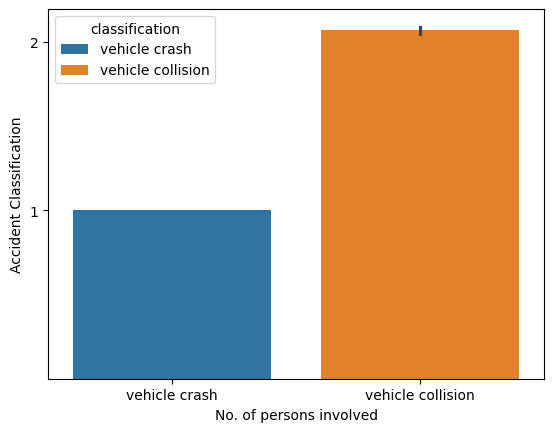

In [54]:
sns.barplot(crash_inv,
            x="classification",
            y="no. of person involved",
            hue="classification")
plt.yticks([1, 2])
plt.ylabel("Accident Classification")
plt.xlabel("No. of persons involved")

Accident Location

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 [Text(0, 0, 'Quezon City'),
  Text(1, 0, 'Mandaluyong'),
  Text(2, 0, 'Makati'),
  Text(3, 0, 'Pasig'),
  Text(4, 0, 'Cebu City'),
  Text(5, 0, 'Cubao'),
  Text(6, 0, 'Muntinlupa'),
  Text(7, 0, 'Pasay'),
  Text(8, 0, 'Taguig'),
  Text(9, 0, 'Marikina'),
  Text(10, 0, 'Scout Area'),
  Text(11, 0, 'Bago Bantay'),
  Text(12, 0, 'Parañaque'),
  Text(13, 0, 'Project 4'),
  Text(14, 0, 'San Juan'),
  Text(15, 0, 'Ermita'),
  Text(16, 0, 'Malate'),
  Text(17, 0, 'Santa Mesa Heights'),
  Text(18, 0, 'Paco'),
  Text(19, 0, 'Sampaloc'),
  Text(20, 0, 'Las Piñas'),
  Text(21, 0, 'Manila'),
  Text(22, 0, 'Galas'),
  Text(23, 0, 'Santa Mesa'),
  

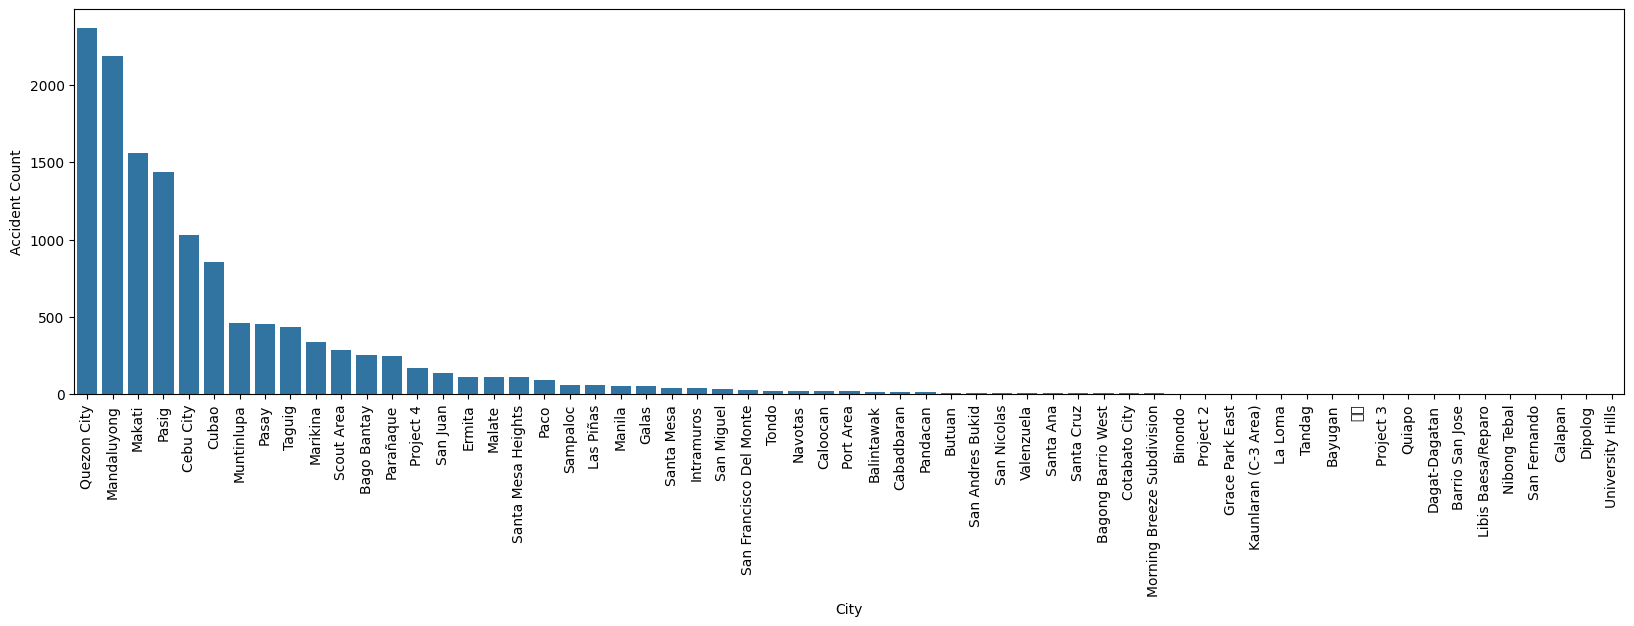

In [97]:
crash_city = crash_df.groupby(["city"]).count()["timezone"].reset_index()
crash_city.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_city.rename(columns={'timezone':'accident count'}, inplace=True)

plt.figure(figsize=[20, 5])
sns.barplot(x=crash_city["city"], y=crash_city["accident count"])
plt.ylabel("Accident Count", fontsize=10)
plt.xlabel("City", fontsize=10)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'rain'),
  Text(3, 0, 'partly-cloudy-night'),
  Text(4, 0, 'clear-night'),
  Text(5, 0, 'cloudy'),
  Text(6, 0, 'wind'),
  Text(7, 0, 'fog')])

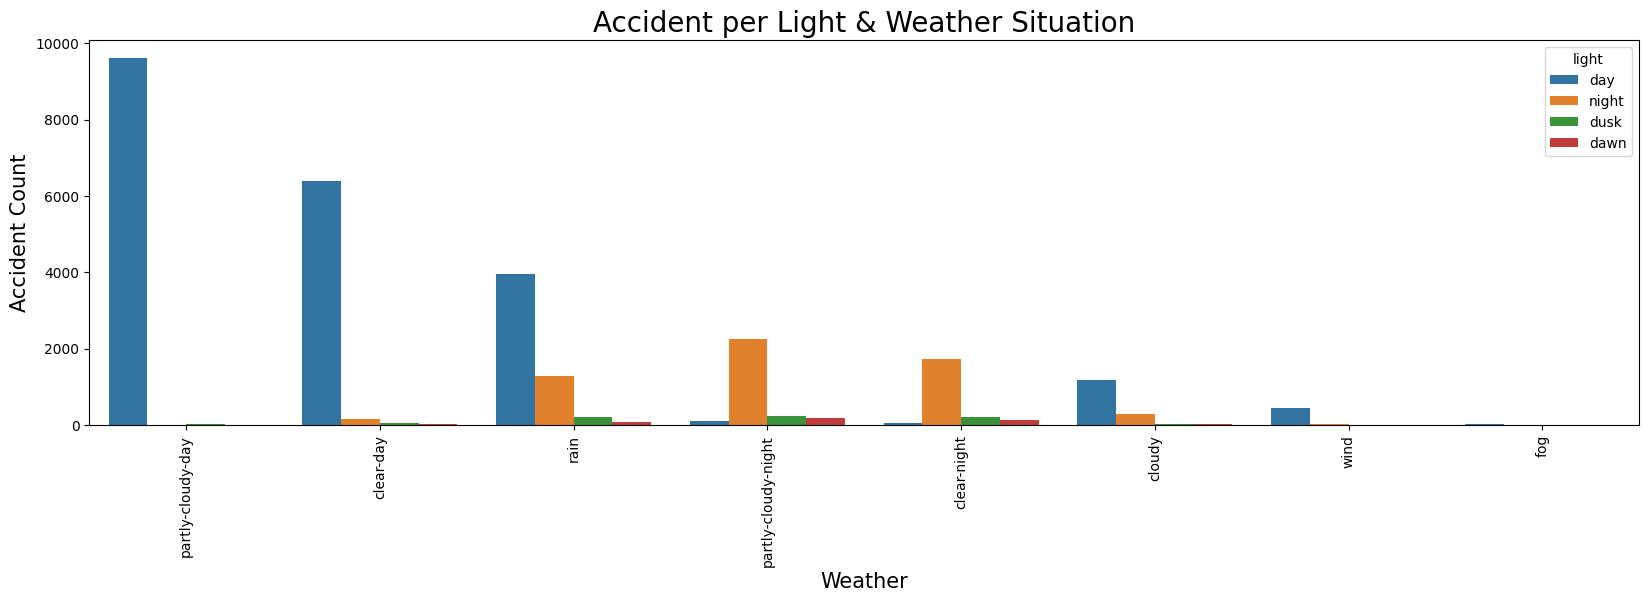

In [102]:
crash_city = crash_df.groupby(["light", "weather"]).count()["timezone"].reset_index()
crash_city.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_city.rename(columns={'timezone':'accident count'}, inplace=True)
plt.figure(figsize=[20, 5])

sns.barplot(data=crash_city,
            x="weather",
            y="accident count",
            hue="light")
plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("Weather", fontsize=15)
plt.title("Accident per Light & Weather Situation", fontsize=20)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

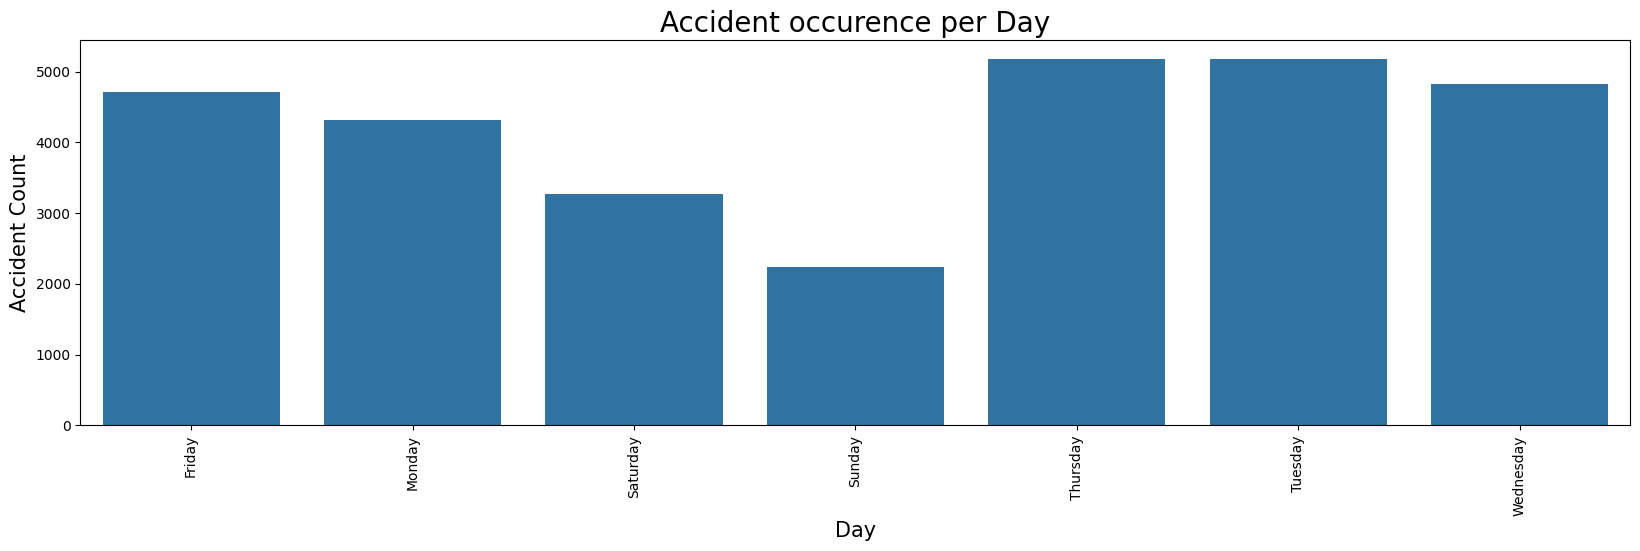

In [109]:
crash_day = crash_df.groupby(["occurred_dayofweek"]).count()["timezone"].reset_index()
# crash_day.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_day.rename(columns={'timezone':'accident count'}, inplace=True)
plt.figure(figsize=[20, 5])

sns.barplot(data=crash_day,
            x="occurred_dayofweek",
            y="accident count")
plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Accident occurence per Day", fontsize=20)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0')])

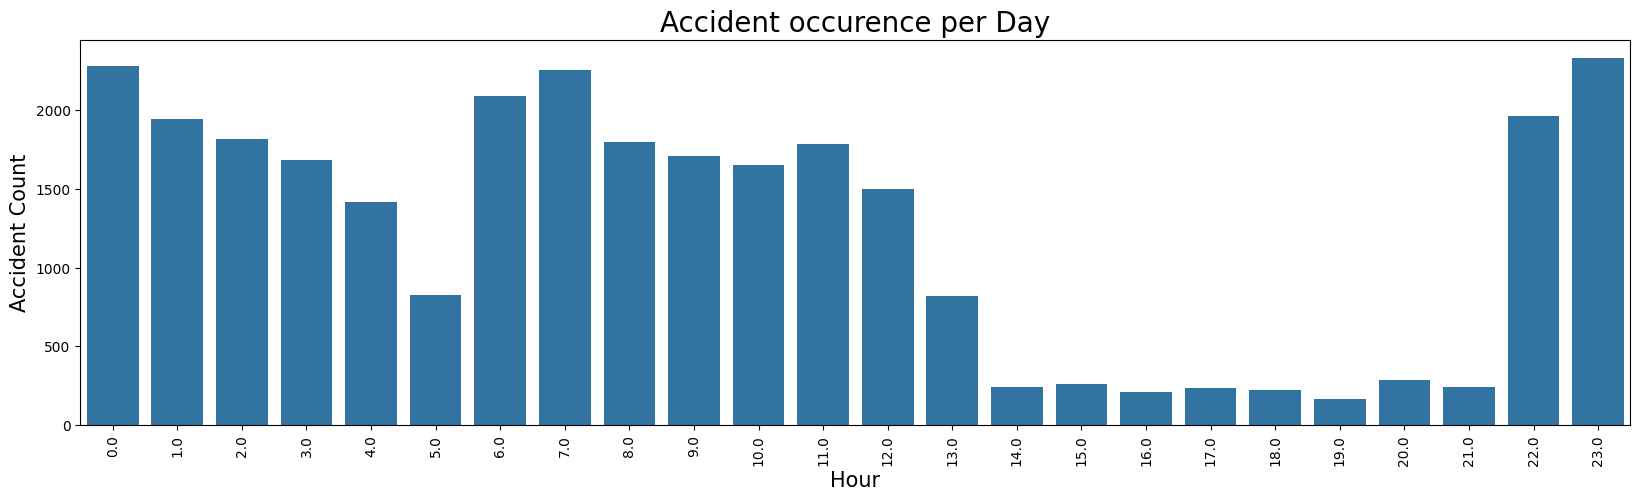

In [111]:
crash_hour = crash_df.groupby(["occurred_hour"]).count()["timezone"].reset_index()
crash_hour.rename(columns={'timezone':'accident count'}, inplace=True)
plt.figure(figsize=[20, 5])

sns.barplot(data=crash_hour,
            x="occurred_hour",
            y="accident count")
plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.title("Accident occurence per Day", fontsize=20)
plt.xticks(rotation=90)

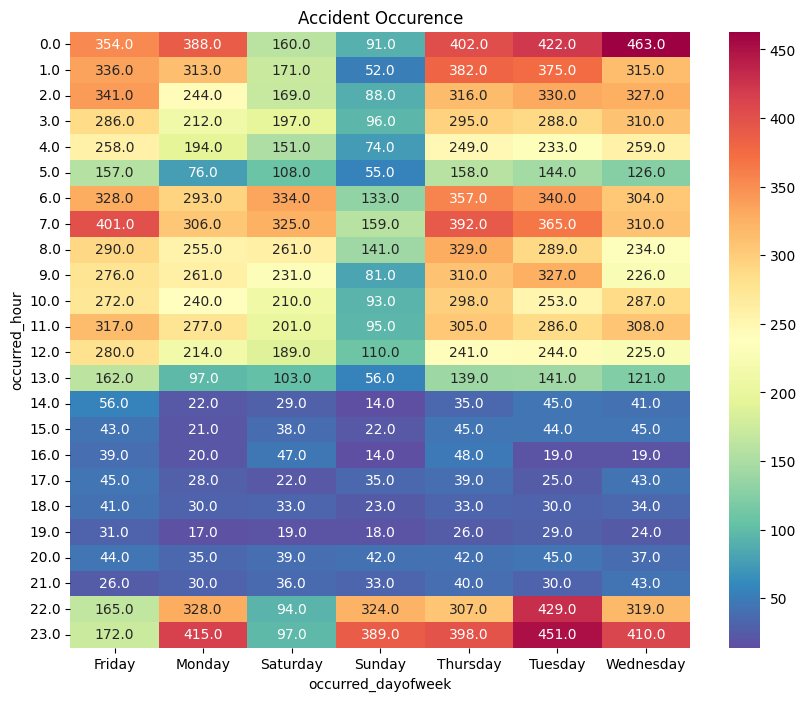

In [162]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "occurred_hour"]).count()["timezone"].reset_index()
crash_hour_day.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day.pivot(index="occurred_hour",
                                   columns="occurred_dayofweek",
                                   values="accident count")

plt.figure(figsize=(10,8))
plt.title("Accident Occurence")
sns.heatmap(data=crash_pivot,
            annot=True,
            fmt='.1f',
            cmap="Spectral_r")
plt.show()

In [138]:
fig = px.imshow(crash_pivot,
                color_continuous_scale='spectral_r')
fig.update_layout(title="Daily Accident  per Hour",
                  xaxis_title="Day of the week",
                  yaxis_title="Hour")
fig.update_yaxes(tickmode='array')

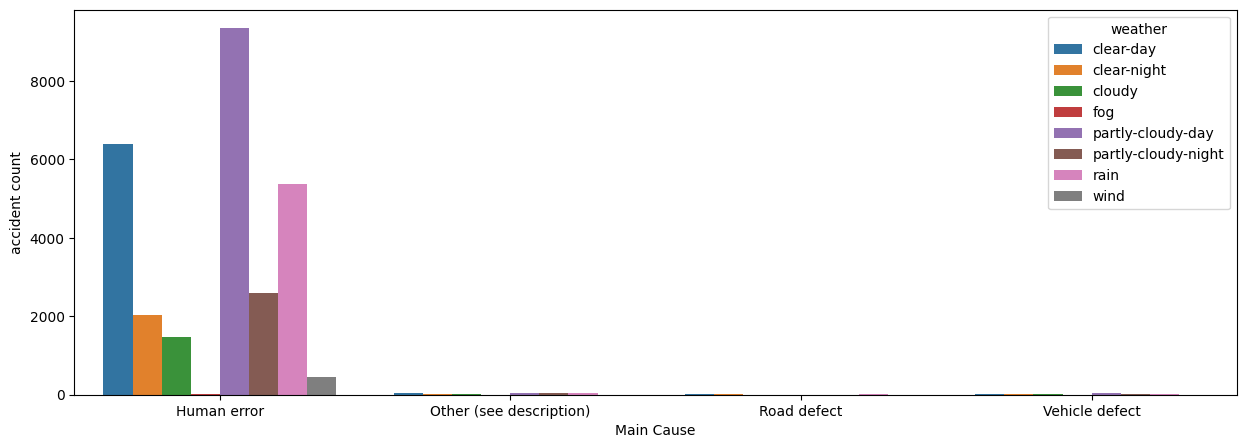

In [167]:
crash_cause_weather = crash_df.groupby(["Main Cause", "weather"]).count()["timezone"].reset_index()
crash_cause_weather.rename(columns={"timezone":'accident count'}, inplace=True)
crash_cause_weather

plt.figure(figsize=(15, 5))
fig = sns.barplot(crash_cause_weather,
                  x="Main Cause",
                  y="accident count",
                  hue="weather")

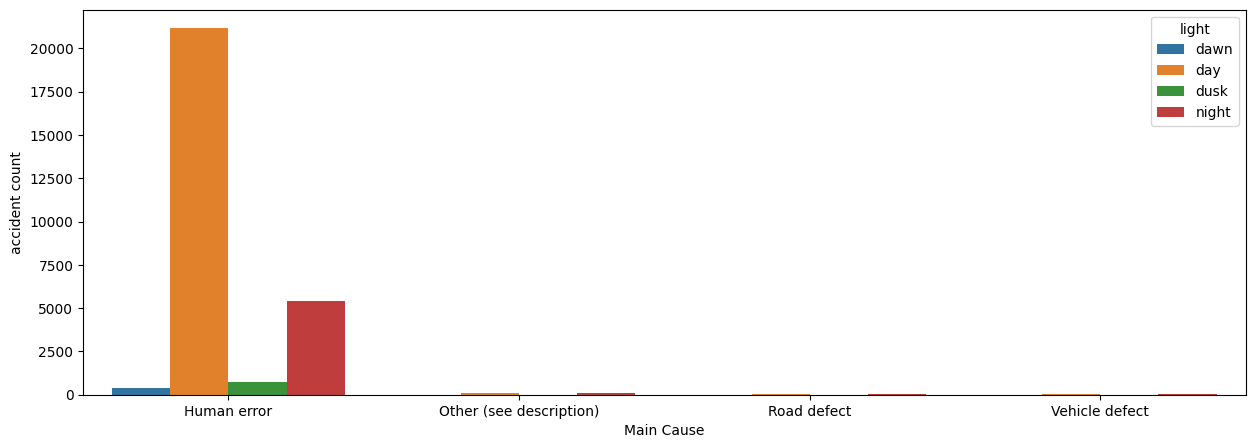

In [166]:
crash_cause_light = crash_df.groupby(["Main Cause", "light"]).count()["timezone"].reset_index()
crash_cause_light.rename(columns={"timezone":'accident count'}, inplace=True)
plt.figure(figsize=(15, 5))
fig = sns.barplot(crash_cause_light,
                  x="Main Cause",
                  y="accident count",
                  hue="light")

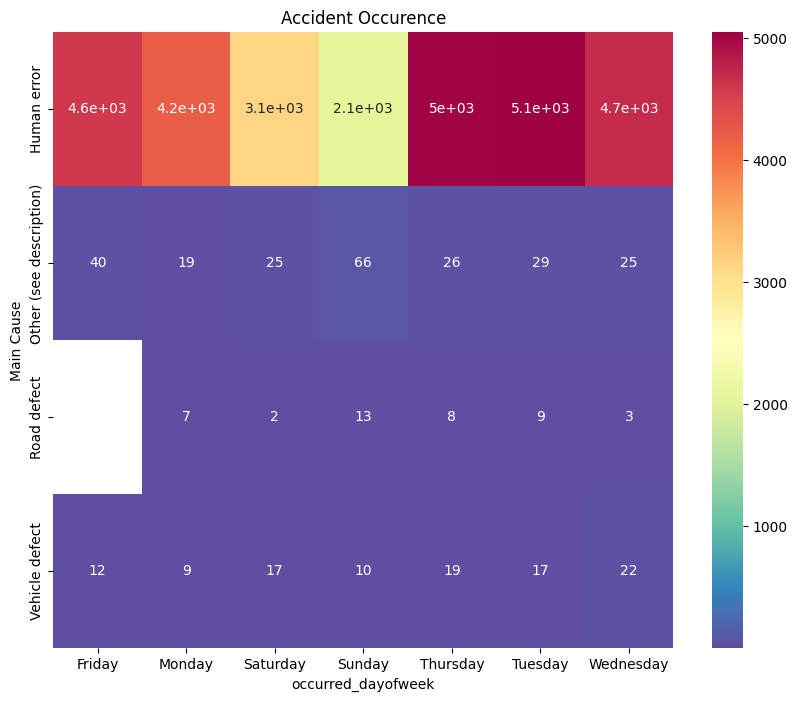

In [157]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "Main Cause"]).count()["timezone"].reset_index()
crash_hour_day.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day.pivot(index="Main Cause",
                                   columns="occurred_dayofweek",
                                   values="accident count")

plt.figure(figsize=(10,8))
plt.title("Accident Occurence")
sns.heatmap(data=crash_pivot,
            annot=True,
            cmap="Spectral_r")
plt.show()

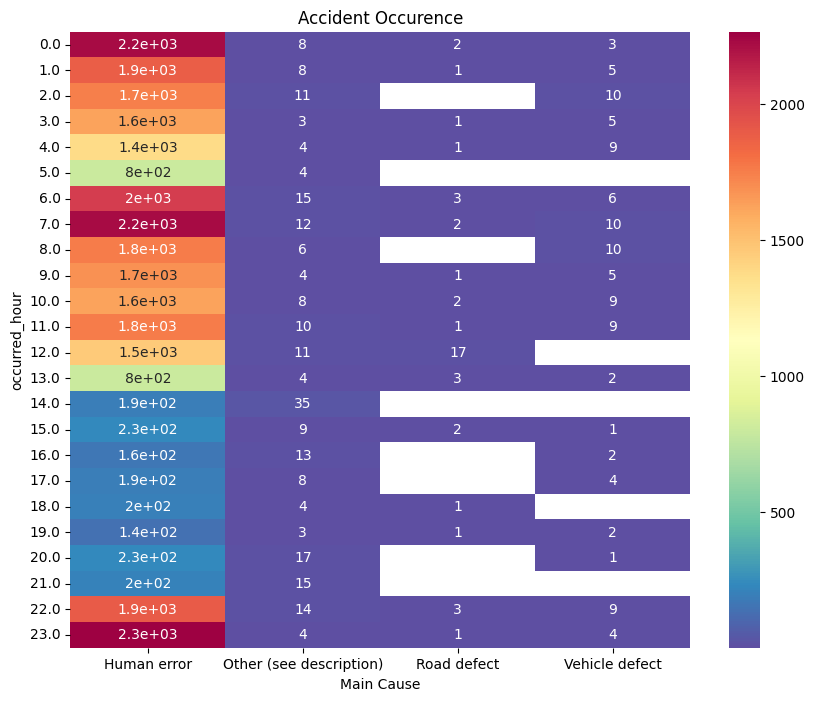

In [159]:
crash_hour_day = crash_df.groupby(["occurred_hour", "Main Cause"]).count()["timezone"].reset_index()
crash_hour_day.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day.pivot(index="Main Cause",
                                   columns="occurred_hour",
                                   values="accident count")

plt.figure(figsize=(10,8))
plt.title("Accident Occurence")
sns.heatmap(data=crash_pivot.T,
            annot=True,
            cmap="Spectral_r")
plt.show()